In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
def welfare(epsilon):
    return - (2 - 2/3*epsilon + 2/9*epsilon**2)

In [6]:
filename = "sweep_e101_q6_SELFISH_EPSILON_AVERAGE_N100_S1_A3_n0_I10000_eVariable_g0_a0.01_qVariable .csv"

In [28]:
df = pd.read_csv(filename)

In [9]:
df

,Unnamed: 0,epsilon,norm,T_mean,T_std,Lyapunov,repetition,oneShot
0,0,0.0,uniform,-1.580200,2.220446e-16,-0.014251,0,-1.5802
1,1,0.0,uniform,-1.553000,0.000000e+00,0.030141,1,-1.5530
2,2,0.0,uniform,-1.551200,2.220446e-16,-0.013926,2,-1.5512
3,3,0.0,uniform,-1.545200,4.440892e-16,0.016887,3,-1.5452
4,4,0.0,uniform,-1.555700,4.440892e-16,-0.005882,4,-1.5557
...,...,...,...,...,...,...,...,...
80795,80795,1.0,duc,-1.559864,1.572816e-02,-0.000050,95,-2.0000
80796,80796,1.0,duc,-1.559732,1.616209e-02,-0.001088,96,-2.0000
80797,80797,1.0,duc,-1.560558,1.661114e-02,0.000161,97,-2.0000
80798,80798,1.0,duc,-1.559795,1.638141e-02,-0.000261,98,-2.0000


In [10]:
zoomFile = "/Users/ccarissimo/Desktop/ccarissimo/sweep_e101_q5_SELFISH_EPSILON_AVERAGE_N100_S1_A3_n0_I10000_eVariable_g0_a0.01_qVariable .csv"

In [11]:
Z = pd.read_csv(zoomFile)

In [12]:
Z

,Unnamed: 0,epsilon,norm,T_mean,T_std,Lyapunov,repetition,oneShot
0,0,0.00,uniform,-1.572400,2.220446e-16,0.022567,0,-1.5724
1,1,0.00,uniform,-1.548500,2.220446e-16,0.017897,1,-1.5485
2,2,0.00,uniform,-1.605800,8.881784e-16,0.026716,2,-1.6058
3,3,0.00,uniform,-1.620100,4.440892e-16,0.020137,3,-1.6201
4,4,0.00,uniform,-1.635400,4.440892e-16,0.020921,4,-1.6354
...,...,...,...,...,...,...,...,...
50495,50495,0.15,udc,-1.905916,2.646989e-02,0.007582,95,-2.0000
50496,50496,0.15,udc,-1.905650,2.678826e-02,0.006768,96,-2.0000
50497,50497,0.15,udc,-1.905615,2.717701e-02,0.006619,97,-2.0000
50498,50498,0.15,udc,-1.905539,2.686827e-02,0.008729,98,-2.0000


In [13]:
df = pd.concat([df, Z])

In [14]:
Z['poa'] = Z['T_mean']/-1.5

In [29]:
df['poa'] = df['T_mean']/-1.5

## Heatmaps

In [32]:
means = df.groupby(["norm", "epsilon"]).mean()
var = df.groupby(["norm", "epsilon"]).var()

In [34]:
means

Unnamed: 0    T_mean     T_std  Lyapunov  repetition  \
norm    epsilon                                                         
cdu     0.00          249.5 -2.000000  0.000000       NaN        49.5   
        0.01         1049.5 -1.953800  0.012260  0.001844        49.5   
        0.02         1849.5 -1.944341  0.021286 -0.000301        49.5   
        0.03         2649.5 -1.937288  0.026485 -0.000725        49.5   
        0.04         3449.5 -1.933802  0.028880 -0.000144        49.5   
...                     ...       ...       ...       ...         ...   
uniform 0.96        76849.5 -1.569117  0.017743  0.000037        49.5   
        0.97        77649.5 -1.566779  0.017350 -0.000024        49.5   
        0.98        78449.5 -1.564496  0.017056 -0.000023        49.5   
        0.99        79249.5 -1.562171  0.016654 -0.000015        49.5   
        1.00        80049.5 -1.560057  0.016290 -0.000031        49.5   

                  oneShot       poa  
norm    epsilon                      
cdu     0.00    -2.000000  1.333333  
        0.01    -1.958062  1.302533  
        0.02    -1.952462  1.296227  
        0.03    -1.953219  1.291526  
        0.04    -1.961103  1.289201  
...                   ...       ...  
uniform 0.96    -2.000000  1.046078  
        0.97    -2.000000  1.044520  
        0.98    -2.000000  1.042997  
        0.99    -2.000000  1.041447  
        1.00    -2.000000  1.040038  

[1283 rows x 7 columns]

In [25]:
# # pandas pivot with multiple variables
# heatmap_mean = pd.pivot_table(means, values='T_mean', index=['epsilon'], columns='norm')
# heatmap_var = pd.pivot_table(var, values='T_mean', index=['epsilon'], columns='norm')
# heatmap_os_mean = pd.pivot_table(means, values='oneShot', index=['epsilon'], columns='norm')
# heatmap_os_var = pd.pivot_table(var, values='oneShot', index=['epsilon'], columns='norm')
# heatmap_lyapunov = pd.pivot_table(means, values='Lyapunov', index=['epsilon'], columns='norm')
# heatmap_lyapunov_var = pd.pivot_table(var, values='Lyapunov', index=['epsilon'], columns='norm')

In [31]:
# pandas pivot with multiple variables
heatmap_mean = pd.pivot_table(means, values='T_mean', index=['norm'], columns='epsilon')
heatmap_var = pd.pivot_table(var, values='T_mean', index=['norm'], columns='epsilon')
heatmap_os_mean = pd.pivot_table(means, values='oneShot', index=['norm'], columns='epsilon')
heatmap_os_var = pd.pivot_table(var, values='oneShot', index=['norm'], columns='epsilon')
heatmap_lyapunov = pd.pivot_table(means, values='Lyapunov', index=['norm'], columns='epsilon')
heatmap_lyapunov_var = pd.pivot_table(var, values='Lyapunov', index=['norm'], columns='epsilon')

In [54]:
# heatmap_mean.index = pd.CategoricalIndex(heatmap_mean.index, categories= ["uniform", "nash", "duc", "udc", "dcu", "ucd", "cdu", "cud"])
# heatmap_mean.sort_index(level=0, inplace=True)
# heatmap_mean = heatmap_mean.apply(abs)

# heatmap_os_mean.index = pd.CategoricalIndex(heatmap_os_mean.index, categories= ["uniform", "nash", "duc", "udc", "dcu", "ucd", "cdu", "cud"])
# heatmap_os_mean.sort_index(level=0, inplace=True)
# heatmap_os_mean = heatmap_os_mean.apply(abs)
heatmaps = [heatmap_mean, heatmap_var, heatmap_os_mean, heatmap_os_var, heatmap_lyapunov, heatmap_lyapunov_var]

for hm in heatmaps:
    hm.index = pd.CategoricalIndex(hm.index, categories= ["uniform", "nash", "duc", "udc", "dcu", "ucd", "cdu", "cud"])
    hm.sort_index(level=0, inplace=True)
    hm = hm.apply(abs)

/var/folders/11/3vmp2wls5_xb0s9pfn4zdp580000gq/T/ipykernel_12834/1606188681.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('heatmap_travel_time_mean.pdf',dpi=150, figsize=(9,6))


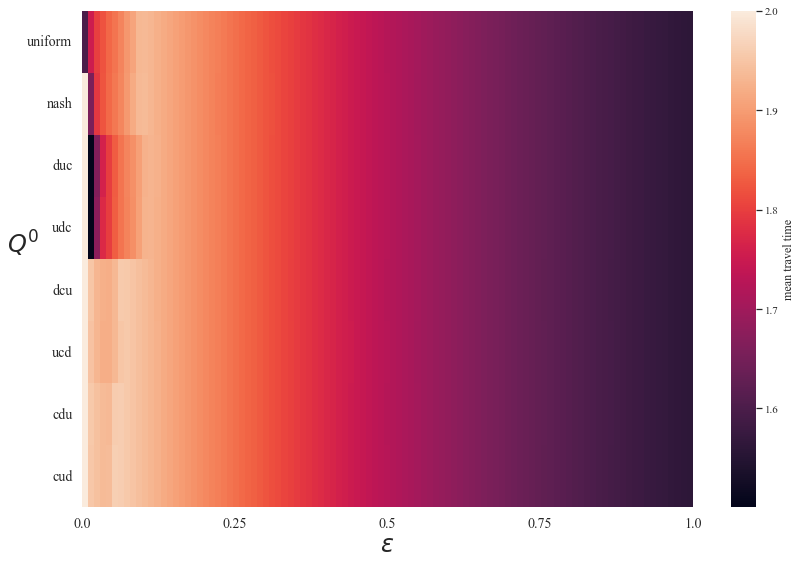

In [76]:
plt.figure(figsize=(12,8))
sns.set(font='Times New Roman')
sns.heatmap(heatmap_mean, cbar_kws={'label': 'mean travel time'})
plt.xlabel(r"$\epsilon$", size=24, rotation='horizontal')
plt.xticks(np.linspace(0, 101, 5), np.linspace(0, 1, 5), rotation='horizontal', size=14)
plt.ylabel(r"$Q^0$", size=24, rotation='horizontal')
plt.yticks(rotation='horizontal', size=14)
# plt.title("Average Travel Time, 100 agents, 10000 learning steps", size=14)
plt.tight_layout()
plt.savefig('heatmap_travel_time_mean.pdf',dpi=150, figsize=(9,6))

/var/folders/11/3vmp2wls5_xb0s9pfn4zdp580000gq/T/ipykernel_12834/1673479409.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('heatmap_oneshot_mean.pdf',dpi=150, figsize=(9,6))


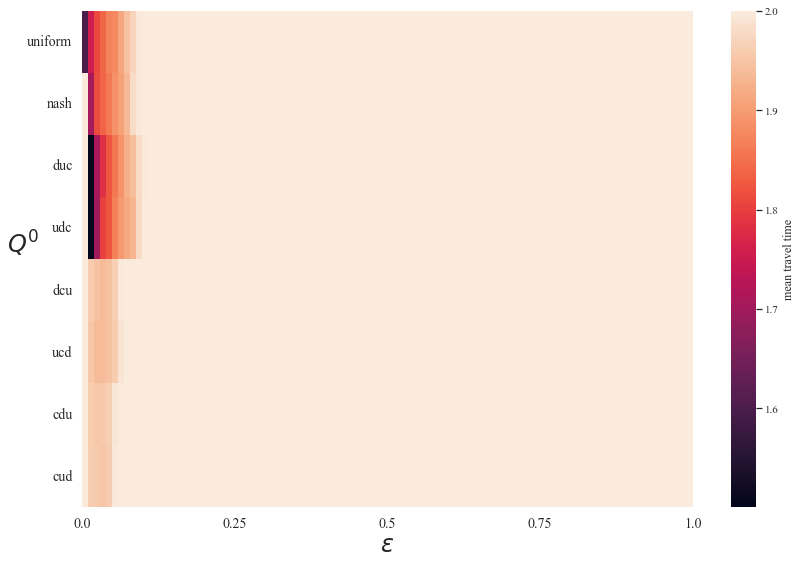

In [85]:
plt.figure(figsize=(12,8))
sns.set(font='Times New Roman')
sns.heatmap(heatmap_os_mean, cbar_kws={'label': 'mean travel time'})
plt.xlabel(r"$\epsilon$", size=24, rotation='horizontal')
plt.xticks(np.linspace(0, 101, 5), np.linspace(0, 1, 5), rotation='horizontal', size=14)
plt.ylabel(r"$Q^0$", size=24, rotation='horizontal')
plt.yticks(rotation='horizontal', size=14)
# plt.title("Average Learned Travel Time, 100 agents, 10000 learning steps", size=14)
plt.tight_layout()
plt.savefig('heatmap_oneshot_mean.pdf',dpi=150, figsize=(9,6))

/var/folders/11/3vmp2wls5_xb0s9pfn4zdp580000gq/T/ipykernel_12834/4197072574.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('heatmap_oneshot_variance.pdf',dpi=150, figsize=(9,6))


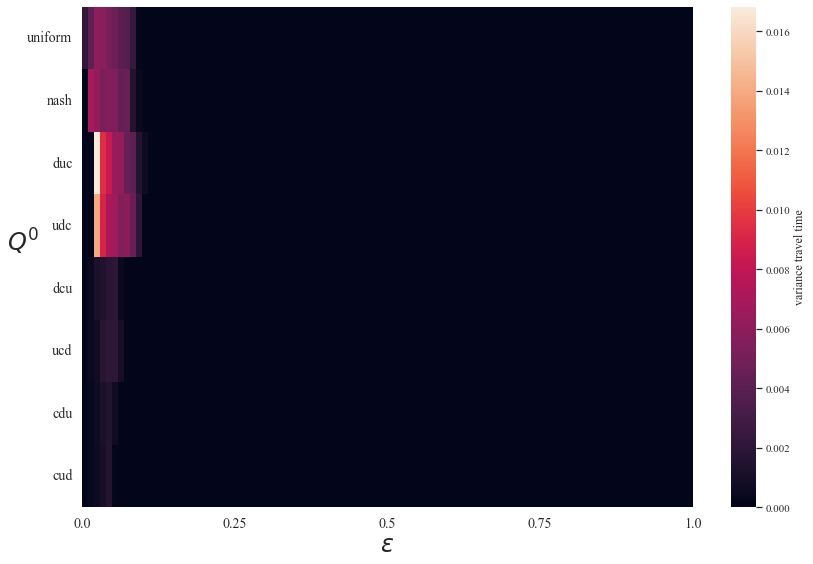

In [82]:
plt.figure(figsize=(12,8))
sns.set(font='Times New Roman')
sns.heatmap(heatmap_os_var, cbar_kws={'label': 'variance travel time'})
plt.xlabel(r"$\epsilon$", size=24, rotation='horizontal')
plt.xticks(np.linspace(0, 101, 5), np.linspace(0, 1, 5), rotation='horizontal', size=14)
plt.ylabel(r"$Q^0$", size=24, rotation='horizontal')
plt.yticks(rotation='horizontal', size=14)
# plt.title("Variance Learned Travel Time, 100 agents, 10000 learning steps", size=14)
plt.tight_layout()
plt.savefig('heatmap_oneshot_variance.pdf',dpi=150, figsize=(9,6))

/var/folders/11/3vmp2wls5_xb0s9pfn4zdp580000gq/T/ipykernel_12834/45301746.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('heatmap_travel_time_variance.pdf',dpi=150, figsize=(9,6))


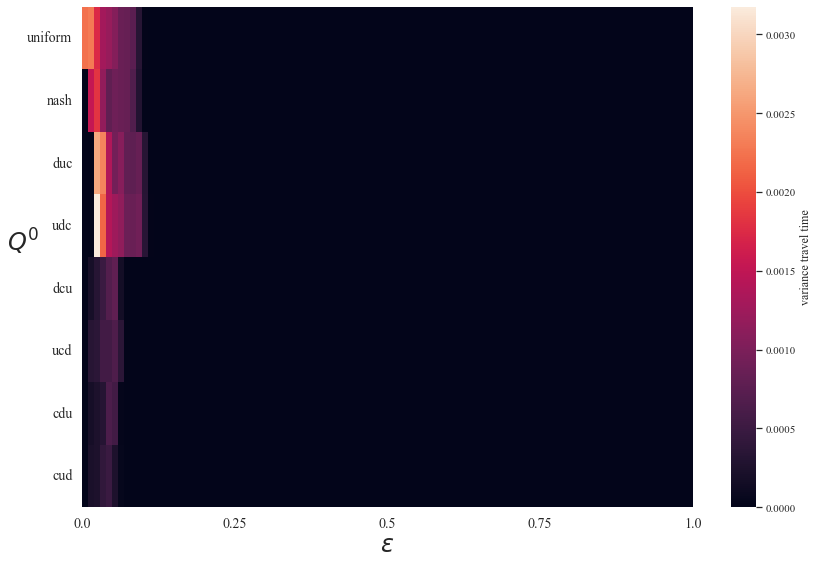

In [83]:
plt.figure(figsize=(12,8))
sns.set(font='Times New Roman')
sns.heatmap(heatmap_var, cbar_kws={'label': 'variance travel time'})
plt.xlabel(r"$\epsilon$", size=24, rotation='horizontal')
plt.xticks(np.linspace(0, 101, 5), np.linspace(0, 1, 5), rotation='horizontal', size=14)
plt.ylabel(r"$Q^0$", size=24, rotation='horizontal')
plt.yticks(rotation='horizontal', size=14)
# plt.title("Variance Average Travel Time, 100 agents, 10000 learning steps", size=14)
plt.tight_layout()
plt.savefig('heatmap_travel_time_variance.pdf',dpi=150, figsize=(9,6))

/var/folders/11/3vmp2wls5_xb0s9pfn4zdp580000gq/T/ipykernel_12834/646906876.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('heatmap_average_lyapunov.pdf',dpi=150, figsize=(9,6))


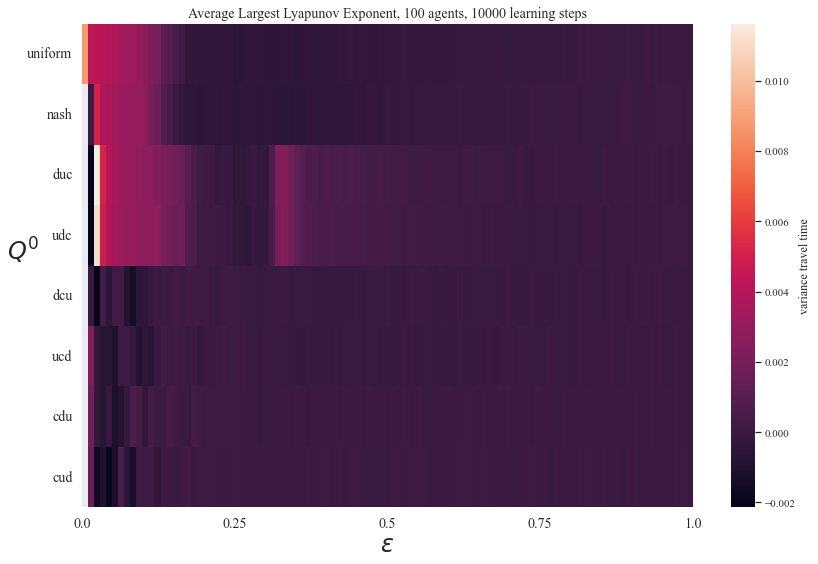

In [84]:
plt.figure(figsize=(12,8))
sns.set(font='Times New Roman')
sns.heatmap(heatmap_lyapunov, cbar_kws={'label': 'variance travel time'})
plt.xlabel(r"$\epsilon$", size=24, rotation='horizontal')
plt.xticks(np.linspace(0, 101, 5), np.linspace(0, 1, 5), rotation='horizontal', size=14)
plt.ylabel(r"$Q^0$", size=24, rotation='horizontal')
plt.yticks(rotation='horizontal', size=14)
plt.title("Average Largest Lyapunov Exponent, 100 agents, 10000 learning steps", size=14)
plt.tight_layout()
plt.savefig('heatmap_average_lyapunov.pdf',dpi=150, figsize=(9,6))

<IPython.core.display.Javascript object>


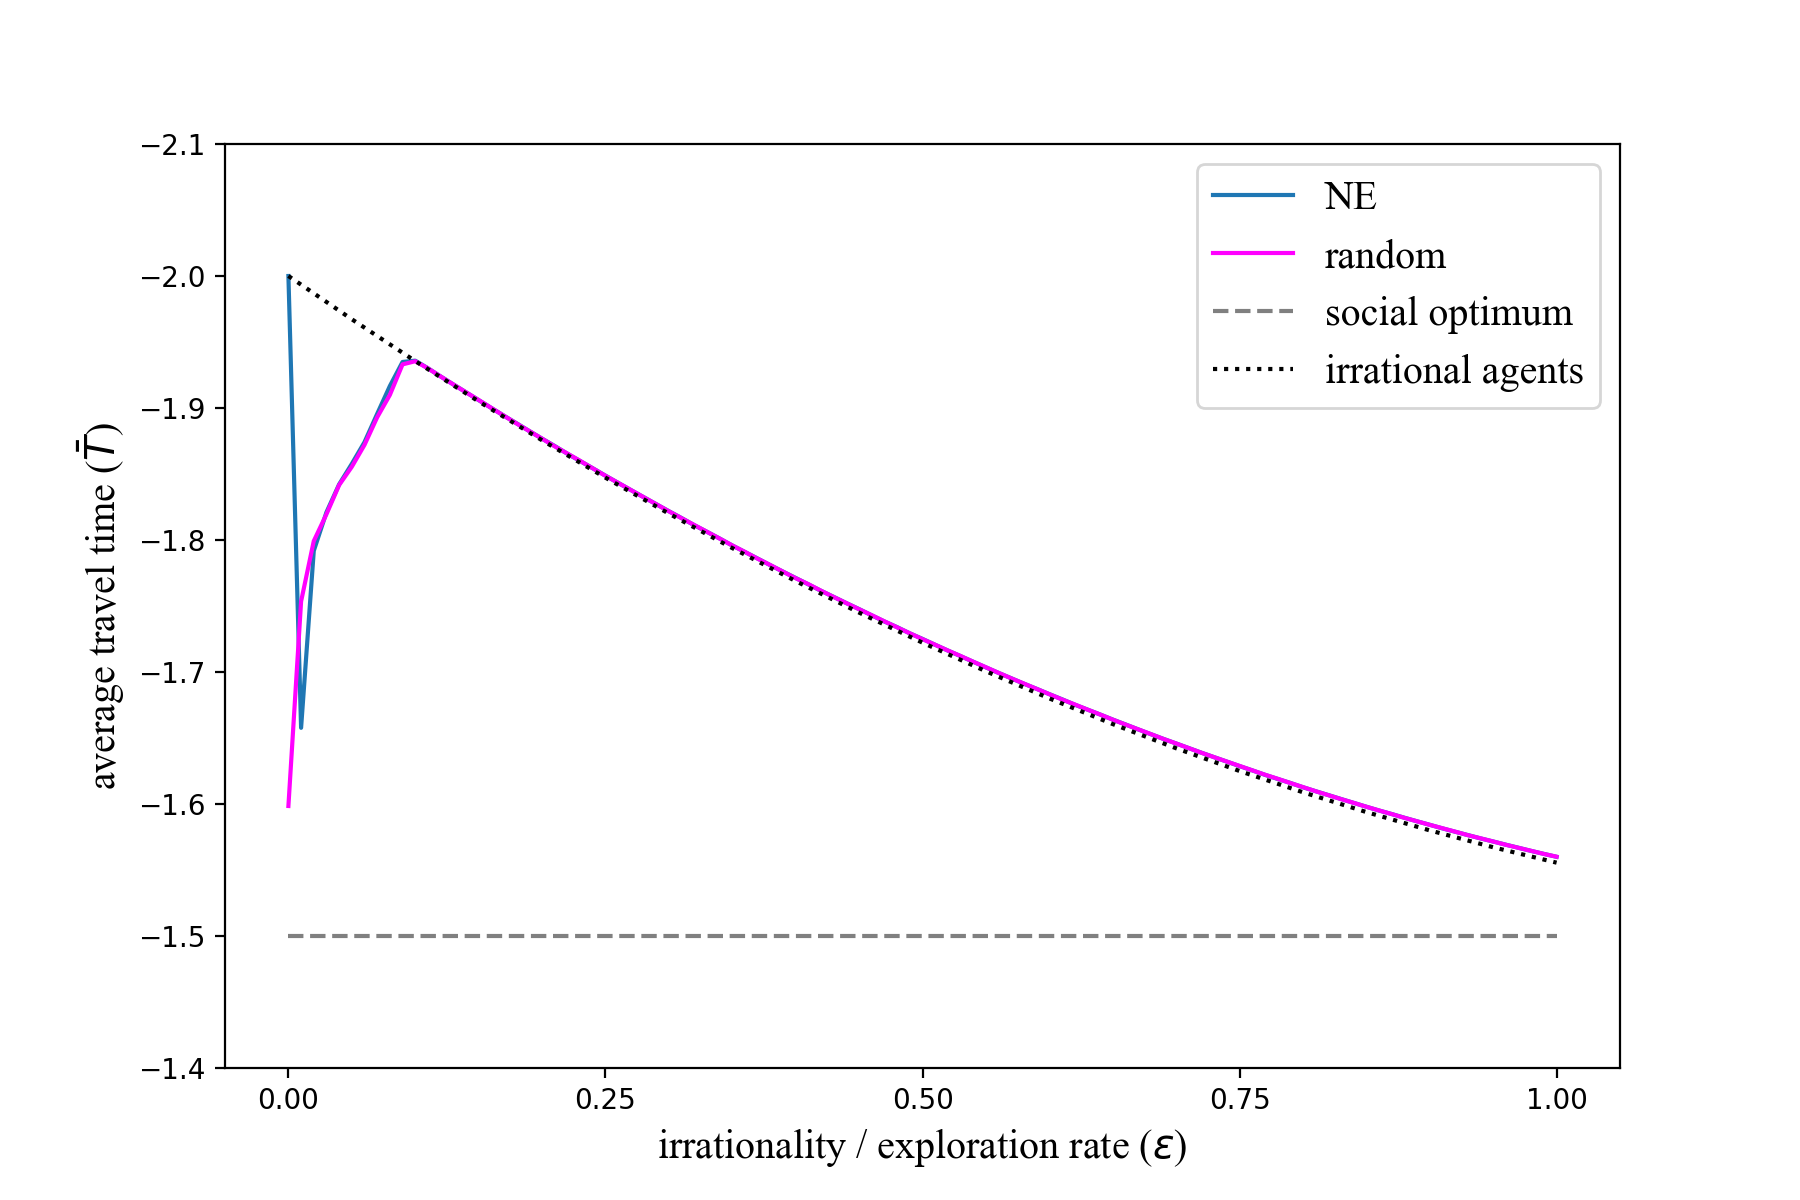

In [55]:
%matplotlib notebook

norms = df.norm.unique().tolist()
opt = np.ones(21) * -1.5
x_vals = np.linspace(0, 1, 21)
y_vals = welfare(x_vals)

plt.figure(figsize=(9,6))

means.loc["nash"]["T_mean"].plot(legend=True, label="NE", color=u'#1f77b4')
means.loc["uniform"]["T_mean"].plot(legend=True, label="random", color="magenta")
# means.loc["cud"]["T_mean"].plot(legend=True, label="c > ud", color="orange")
# means.loc["ucd"]["T_mean"].plot(legend=True, label="u > c > d", color="red")
# means.loc["udc"]["T_mean"].plot(legend=True, label="ud > c", color="purple")

plt.ylim((-1.4, -2.1))
# plt.yticks(ticks=np.linspace(-1.4, -2.1, 5), labels=np.linspace(1.4, 2.1, 5))

plt.xticks(ticks=np.linspace(0, 1, 5))

plt.plot(x_vals, opt, label="social optimum", linestyle="--", color="gray")
plt.plot(x_vals, y_vals, label="irrational agents", linestyle=":", color="black")
plt.xlabel(r"irrationality / exploration rate ($\epsilon$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.ylabel(r"average travel time ($\bar{T}$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.legend(prop={"family": "Times New Roman", "size": "x-large"})

plt.savefig("exploration_sweep.pdf")

<IPython.core.display.Javascript object>


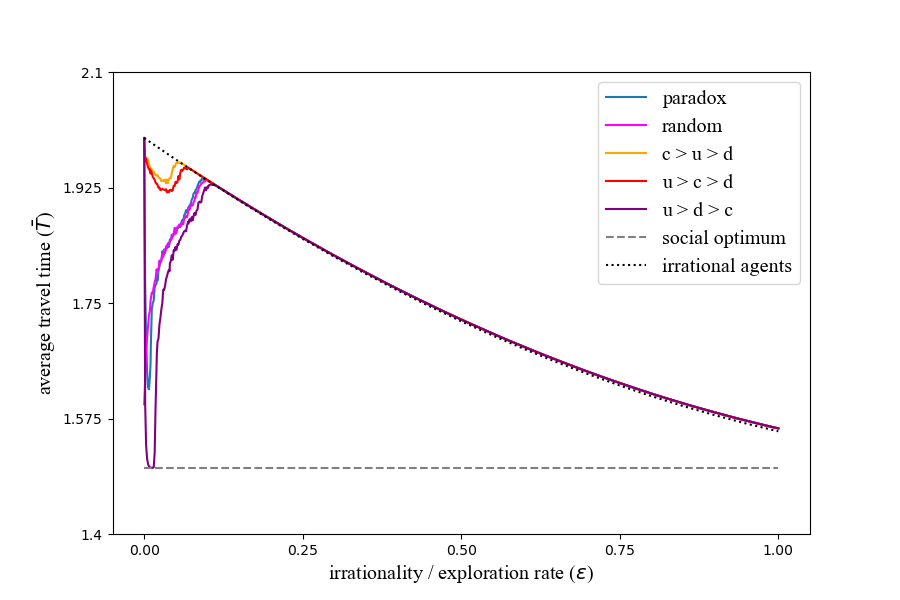

In [17]:
%matplotlib notebook

norms = df.norm.unique().tolist()
opt = np.ones(21) * -1.5
x_vals = np.linspace(0, 1, 21)
y_vals = welfare(x_vals)

plt.figure(figsize=(9,6))

means.loc["nash"]["T_mean"].plot(legend=True, label="paradox", color=u'#1f77b4')
means.loc["uniform"]["T_mean"].plot(legend=True, label="random", color="magenta")
means.loc["cud"]["T_mean"].plot(legend=True, label="c > u > d", color="orange")
means.loc["ucd"]["T_mean"].plot(legend=True, label="u > c > d", color="red")
means.loc["udc"]["T_mean"].plot(legend=True, label="u > d > c", color="purple")

plt.ylim((-1.4, -2.1))
plt.yticks(ticks=np.linspace(-1.4, -2.1, 5), labels=np.linspace(1.4, 2.1, 5))

plt.xticks(ticks=np.linspace(0, 1, 5))

plt.plot(x_vals, opt, label="social optimum", linestyle="--", color="gray")
plt.plot(x_vals, y_vals, label="irrational agents", linestyle=":", color="black")
plt.xlabel(r"irrationality / exploration rate ($\epsilon$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.ylabel(r"average travel time ($\bar{T}$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.legend(prop={"family": "Times New Roman", "size": "x-large"})

plt.savefig("exploration_sweep_NEW.pdf")

<IPython.core.display.Javascript object>


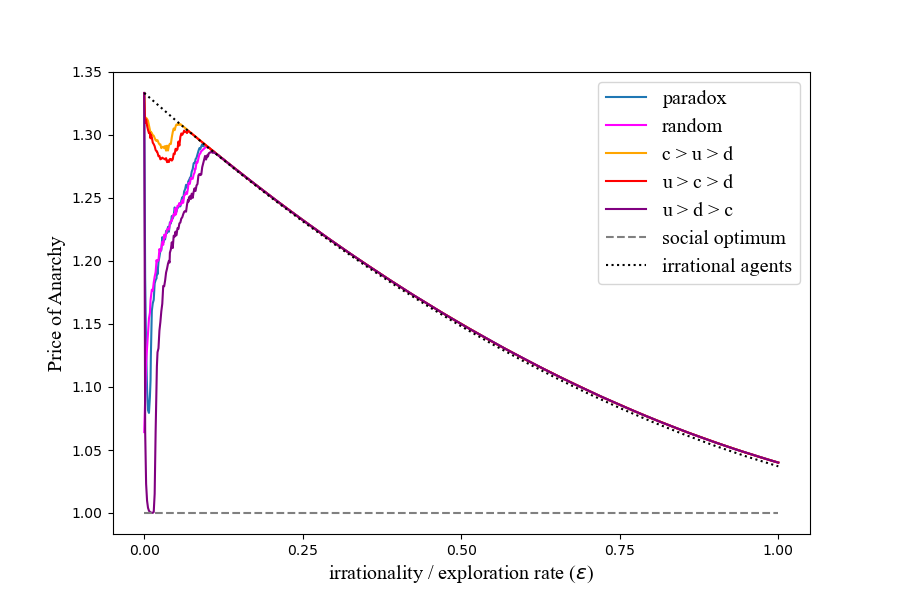

In [18]:
%matplotlib notebook

norms = df.norm.unique().tolist()
opt = np.ones(21)
x_vals = np.linspace(0, 1, 21)
y_vals = welfare(x_vals)/-1.5

plt.figure(figsize=(9,6))

means.loc["nash"]["poa"].plot(legend=True, label="paradox", color=u'#1f77b4')
means.loc["uniform"]["poa"].plot(legend=True, label="random", color="magenta")
means.loc["cud"]["poa"].plot(legend=True, label="c > u > d", color="orange")
means.loc["ucd"]["poa"].plot(legend=True, label="u > c > d", color="red")
means.loc["udc"]["poa"].plot(legend=True, label="u > d > c", color="purple")

# plt.ylim((-1.4, -2.1))
# plt.yticks(ticks=np.linspace(-1.4, -2.1, 5), labels=np.linspace(1.4, 2.1, 5))

plt.xticks(ticks=np.linspace(0, 1, 5))

plt.plot(x_vals, opt, label="social optimum", linestyle="--", color="gray")
plt.plot(x_vals, y_vals, label="irrational agents", linestyle=":", color="black")
plt.xlabel(r"irrationality / exploration rate ($\epsilon$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.ylabel(r"Price of Anarchy", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.legend(prop={"family": "Times New Roman", "size": "x-large"})

plt.savefig("exploration_sweep_PoA.pdf")

<IPython.core.display.Javascript object>


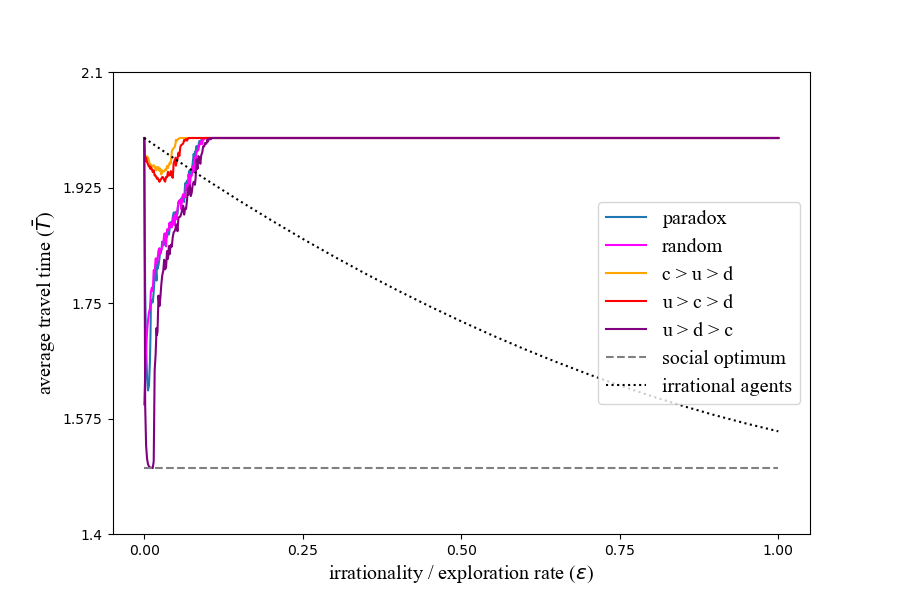

In [19]:
%matplotlib notebook

norms = df.norm.unique().tolist()
opt = np.ones(21) * -1.5
x_vals = np.linspace(0, 1, 21)
y_vals = welfare(x_vals)

plt.figure(figsize=(9,6))

means.loc["nash"]["oneShot"].plot(legend=True, label="paradox", color=u'#1f77b4')
means.loc["uniform"]["oneShot"].plot(legend=True, label="random", color="magenta")
means.loc["cud"]["oneShot"].plot(legend=True, label="c > u > d", color="orange")
means.loc["ucd"]["oneShot"].plot(legend=True, label="u > c > d", color="red")
means.loc["udc"]["oneShot"].plot(legend=True, label="u > d > c", color="purple")

plt.ylim((-1.4, -2.1))
plt.yticks(ticks=np.linspace(-1.4, -2.1, 5), labels=np.linspace(1.4, 2.1, 5))

plt.xticks(ticks=np.linspace(0, 1, 5))

plt.plot(x_vals, opt, label="social optimum", linestyle="--", color="gray")
plt.plot(x_vals, y_vals, label="irrational agents", linestyle=":", color="black")
plt.xlabel(r"irrationality / exploration rate ($\epsilon$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.ylabel(r"average travel time ($\bar{T}$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.legend(prop={"family": "Times New Roman", "size": "x-large"})

plt.savefig("exploration_sweep_oneShot_NEW.pdf")

<IPython.core.display.Javascript object>


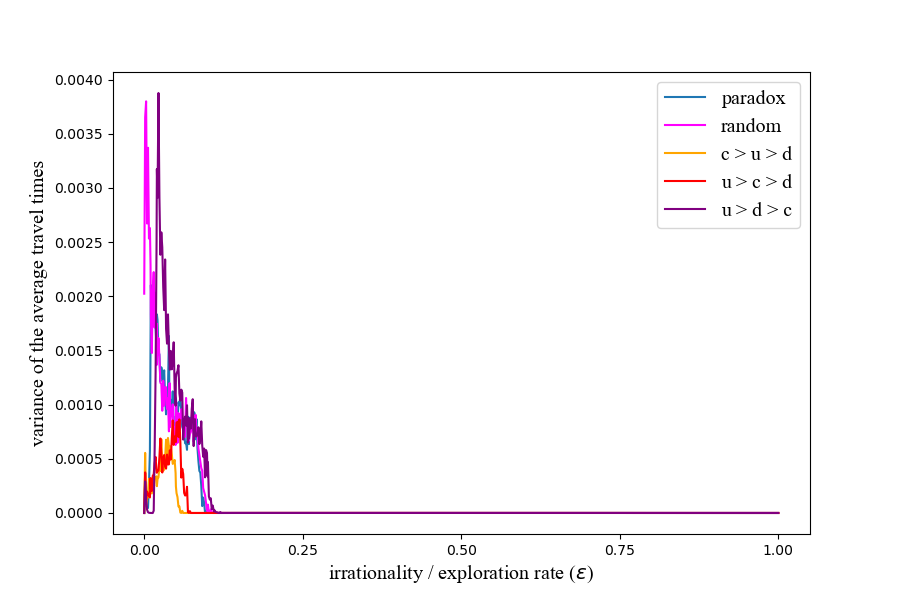

In [20]:
%matplotlib notebook

norms = df.norm.unique().tolist()
opt = np.ones(21) * -1.5
x_vals = np.linspace(0, 1, 21)
y_vals = welfare(x_vals)

plt.figure(figsize=(9,6))

var.loc["nash"]["T_mean"].plot(legend=True, label="paradox", color=u'#1f77b4')
var.loc["uniform"]["T_mean"].plot(legend=True, label="random", color="magenta")
var.loc["cud"]["T_mean"].plot(legend=True, label="c > u > d", color="orange")
var.loc["ucd"]["T_mean"].plot(legend=True, label="u > c > d", color="red")
var.loc["udc"]["T_mean"].plot(legend=True, label="u > d > c", color="purple")

#plt.ylim((-1.4, -2.1))
#plt.yticks(ticks=np.linspace(-1.4, -2.1, 5), labels=np.linspace(1.4, 2.1, 5))

plt.xticks(ticks=np.linspace(0, 1, 5))

# plt.plot(x_vals, opt, label="social optimum", linestyle="--", color="gray")
# plt.plot(x_vals, y_vals, label="irrational agents", linestyle=":", color="black")
plt.xlabel(r"irrationality / exploration rate ($\epsilon$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.ylabel(r"variance of the average travel times", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.legend(prop={"family": "Times New Roman", "size": "x-large"})

plt.savefig("exploration_sweep_std.pdf")

In [22]:
import numpy as np

In [23]:
def udc(epsilon):
    return 2 - epsilon + 5*(epsilon**2)/9
def ne(epsilon):
    return 2 - 2*epsilon/3 + 2*(epsilon**2)/9
def var_ne(epsilon):
    return 4/3*epsilon - 4/9*epsilon**2 + 2/27*epsilon**3 - 4/81*epsilon**4
def var_udc(epsilon):
    return 2/3*epsilon - 14/9*epsilon**2 + 13/9*epsilon**3 - 25/81*epsilon**4

In [24]:
epsilons = np.linspace(0, 1, 101)
Wudc = udc(epsilons)
Wc = ne(epsilons)
VARc = var_ne(epsilons)
VARudc = var_udc(epsilons)

In [25]:
#plt.plot(epsilons, Wudc, label='up (or down) best')
#plt.plot(epsilons, Wc, label='cross best')

<IPython.core.display.Javascript object>


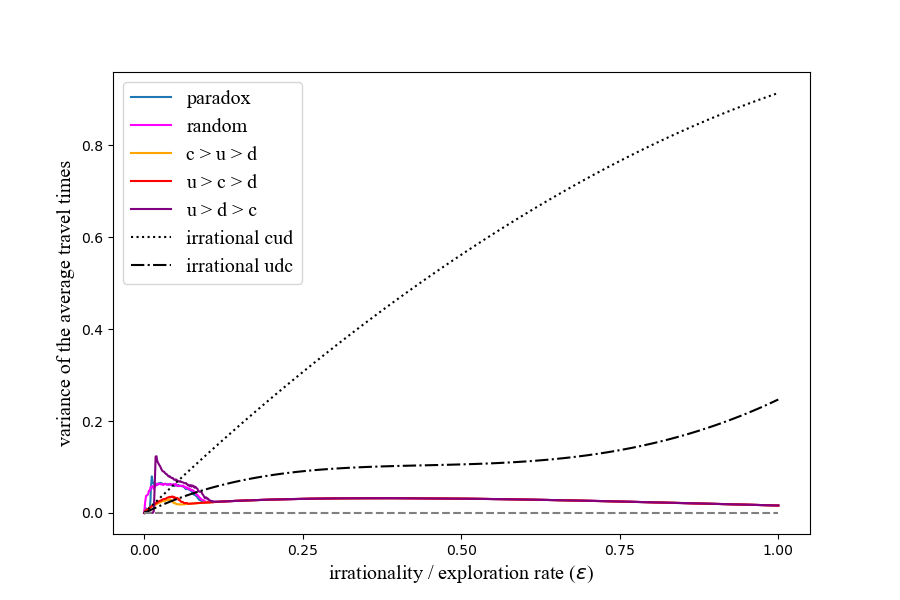

In [26]:
%matplotlib notebook

norms = df.norm.unique().tolist()
opt = np.ones(21) * -1.5
x_vals = np.linspace(0, 1, 21)
y_vals = welfare(x_vals)

plt.figure(figsize=(9,6))

means.loc["nash"]["T_std"].plot(legend=True, label="paradox", color=u'#1f77b4')
means.loc["uniform"]["T_std"].plot(legend=True, label="random", color="magenta")
means.loc["cud"]["T_std"].plot(legend=True, label="c > u > d", color="orange")
means.loc["ucd"]["T_std"].plot(legend=True, label="u > c > d", color="red")
means.loc["udc"]["T_std"].plot(legend=True, label="u > d > c", color="purple")

#plt.ylim((-1.4, -2.1))
#plt.yticks(ticks=np.linspace(-1.4, -2.1, 5), labels=np.linspace(1.4, 2.1, 5))

plt.xticks(ticks=np.linspace(0, 1, 5))

# plt.plot(x_vals, opt, label="social optimum", linestyle="--", color="gray")
# plt.plot(x_vals, y_vals, label="irrational agents", linestyle=":", color="black")
plt.plot(epsilons, VARc, label="irrational cud", linestyle=":", color="black")
plt.plot(epsilons, VARudc, label="irrational udc", linestyle="dashdot", color="black")
plt.plot(x_vals, np.zeros(21), linestyle="--", color="gray")
# plt.yscale("log")
plt.xlabel(r"irrationality / exploration rate ($\epsilon$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.ylabel(r"variance of the average travel times", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.legend(prop={"family": "Times New Roman", "size": "x-large"})

plt.savefig("exploration_sweep_std_runs.pdf")

In [46]:
means

Unnamed: 0    T_mean     T_std  Lyapunov  repetition  \
norm    epsilon                                                         
cdu     0.00          249.5 -2.000000  0.000000       NaN        49.5   
        0.01         1049.5 -1.953800  0.012260  0.001844        49.5   
        0.02         1849.5 -1.944341  0.021286 -0.000301        49.5   
        0.03         2649.5 -1.937288  0.026485 -0.000725        49.5   
        0.04         3449.5 -1.933802  0.028880 -0.000144        49.5   
...                     ...       ...       ...       ...         ...   
uniform 0.96        76849.5 -1.569117  0.017743  0.000037        49.5   
        0.97        77649.5 -1.566779  0.017350 -0.000024        49.5   
        0.98        78449.5 -1.564496  0.017056 -0.000023        49.5   
        0.99        79249.5 -1.562171  0.016654 -0.000015        49.5   
        1.00        80049.5 -1.560057  0.016290 -0.000031        49.5   

                  oneShot  
norm    epsilon            
cdu     0.00    -2.000000  
        0.01    -1.958062  
        0.02    -1.952462  
        0.03    -1.953219  
        0.04    -1.961103  
...                   ...  
uniform 0.96    -2.000000  
        0.97    -2.000000  
        0.98    -2.000000  
        0.99    -2.000000  
        1.00    -2.000000  

[808 rows x 6 columns]

<IPython.core.display.Javascript object>


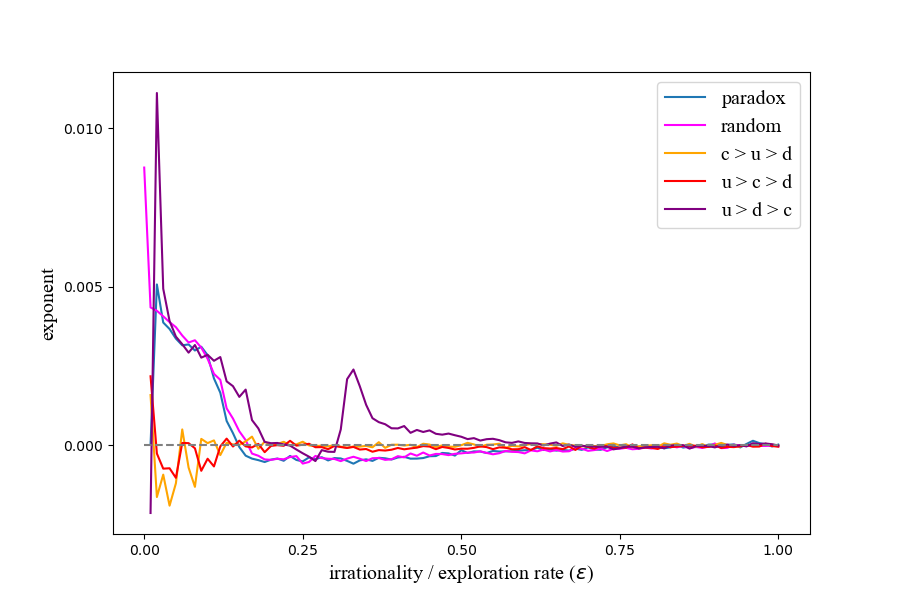

In [33]:
%matplotlib notebook

norms = df.norm.unique().tolist()

plt.figure(figsize=(9,6))

means.loc["nash"]["Lyapunov"].plot(legend=True, label="paradox", color=u'#1f77b4')
means.loc["uniform"]["Lyapunov"].plot(legend=True, label="random", color="magenta")
means.loc["cud"]["Lyapunov"].plot(legend=True, label="c > u > d", color="orange")
means.loc["ucd"]["Lyapunov"].plot(legend=True, label="u > c > d", color="red")
means.loc["udc"]["Lyapunov"].plot(legend=True, label="u > d > c", color="purple")

plt.yticks(ticks=np.linspace(0, 0.01, 3))

plt.xticks(ticks=np.linspace(0, 1, 5))

x_vals = np.linspace(0, 1, 21)
plt.plot(x_vals, np.zeros(21), linestyle="--", color="gray")

plt.xlabel(r"irrationality / exploration rate ($\epsilon$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.ylabel(r"exponent", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.legend(prop={"family": "Times New Roman", "size": "x-large"})

plt.savefig("lyapunov_sweep_NEW.pdf")

## Exploration Plots

In [29]:
from math import sqrt

In [30]:
sqrt(0.016)

0.12649110640673517

In [39]:
df.loc[df["norm"]=="uniform"][df["epsilon"]==0.01][df["repetition"]==4]

/var/folders/11/3vmp2wls5_xb0s9pfn4zdp580000gq/T/ipykernel_1657/4239621847.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[df["norm"]=="uniform"][df["epsilon"]==0.01][df["repetition"]==4]


,Unnamed: 0,epsilon,norm,T_mean,T_std,Lyapunov,repetition,oneShot
804,804,0.01,uniform,-1.779103,0.054147,0.001974,4,-1.7813


# ZOOM PLOTS

In [16]:
meansZ = Z.groupby(["norm", "epsilon"]).mean()
varZ = Z.groupby(["norm", "epsilon"]).var()

<IPython.core.display.Javascript object>


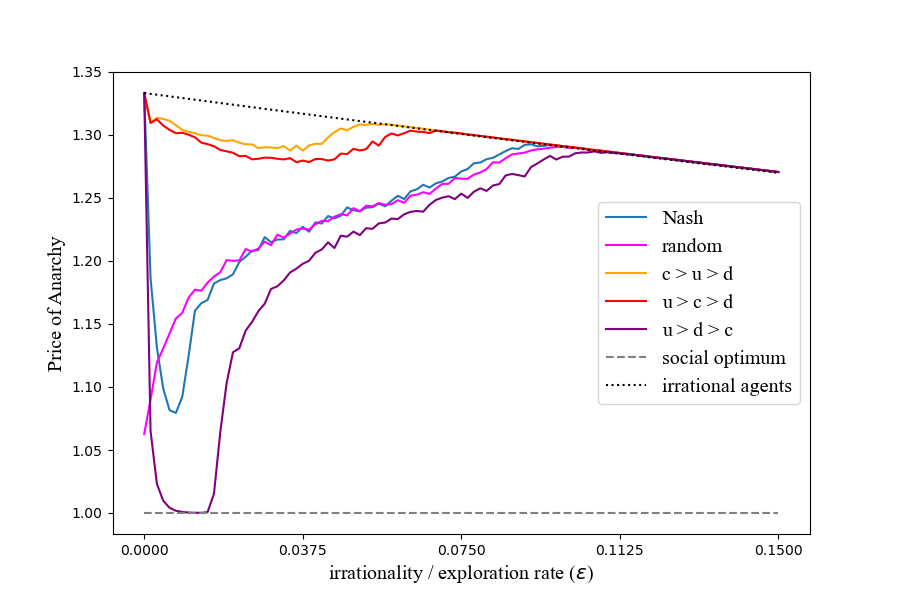

In [19]:
%matplotlib notebook

norms = df.norm.unique().tolist()
opt = np.ones(21)
x_vals = np.linspace(0, 0.15, 21)
y_vals = welfare(x_vals)/-1.5

plt.figure(figsize=(9,6))

meansZ.loc["nash"]["poa"].plot(legend=True, label="Nash", color=u'#1f77b4')
meansZ.loc["uniform"]["poa"].plot(legend=True, label="random", color="magenta")
meansZ.loc["cud"]["poa"].plot(legend=True, label="c > u > d", color="orange")
meansZ.loc["ucd"]["poa"].plot(legend=True, label="u > c > d", color="red")
meansZ.loc["udc"]["poa"].plot(legend=True, label="u > d > c", color="purple")

# plt.ylim((-1.4, -2.1))
# plt.yticks(ticks=np.linspace(-1.4, -2.1, 5), labels=np.linspace(1.4, 2.1, 5))

plt.xticks(ticks=np.linspace(0, 0.15, 5))

plt.plot(x_vals, opt, label="social optimum", linestyle="--", color="gray")
plt.plot(x_vals, y_vals, label="irrational agents", linestyle=":", color="black")
plt.xlabel(r"irrationality / exploration rate ($\epsilon$)", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.ylabel(r"Price of Anarchy", **{"fontname": "Times New Roman", "fontsize": "x-large"})
plt.legend(prop={"family": "Times New Roman", "size": "x-large"})

plt.savefig("exploration_sweep_PoA.pdf")